# 📘 **Pandas Basics III**
[
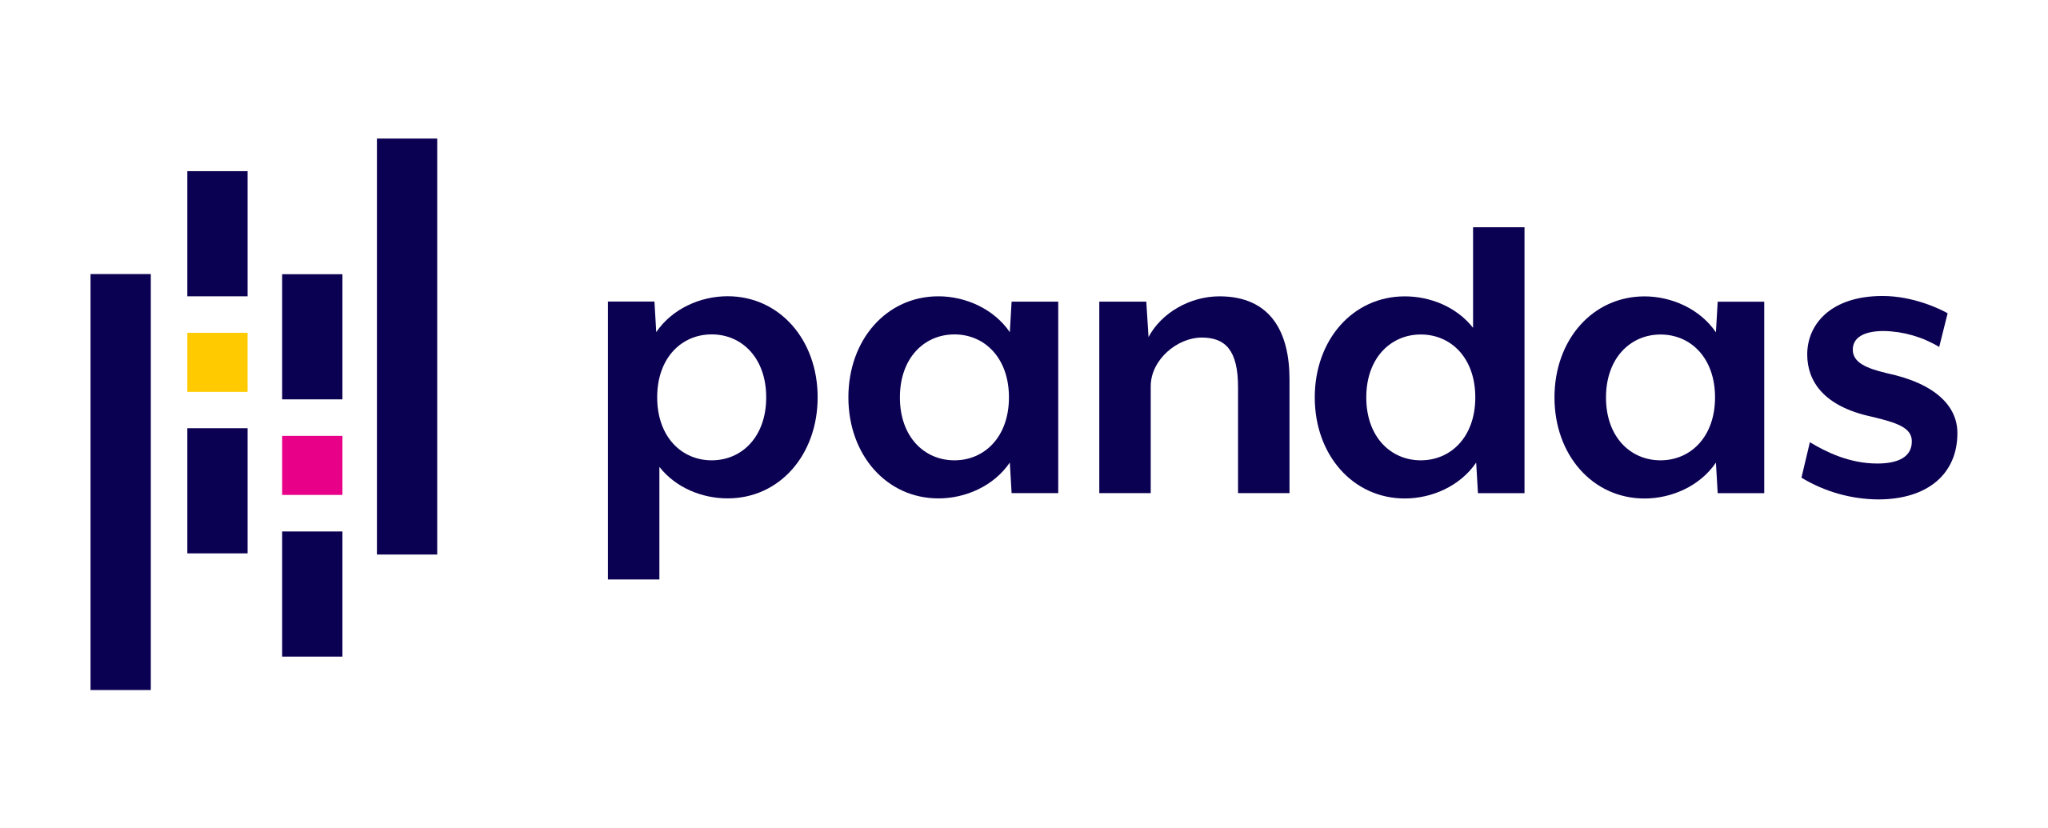](https://pandas.pydata.org/docs/)


### **📚 Introducció a l'entorn**  
##### 🗂️ M0572 Sistemes d'aprenentatge automàtic  
###### 👤 *Robert Ventura Vall-llovera*  

---


**Objectiu:** L'objectiu d'aquest Notebook és veure les funcions de combinacions de datasets utilitzant les fundions: `merge`, `concat`, `join` de la llibreria [Pandas](https://pandas.pydata.org/docs/) per tractar dades

In [1]:
import pandas as pd

### Combinacions

En moltes ocasions haurem de combinar dades de diferents taules.

Per fer això Pandas ofereix tres mètodes bàsics per fer-ho: `concat()`, `join()`, `merge()`.

In [2]:
# exemple
treballadors = pd.DataFrame({'treballador_id': [111,222,333,444],
                    'nom': ['Pere','Marta','Joan','Glòria'],
                    'formacio': ['sistemes', 'sistemes', 'programació', 'programació'],
                    'departament_id': [10, 20, 10,None]
                    });

directius = pd.DataFrame({'treballador_id': [556, 444, 689, 690],
                    'nom': ['Jaume','Glòria','Sílvia','Anna'],
                    'formacio': ['sistemes', None, 'gestió', 'gestió'],
                    'departament_id': [30, None, 50, 50]
                    });

departaments = pd.DataFrame({'departament_id': [10, 20, 30, 40, 50],
                    'nom': ['IT', 'Administració', 'Manteniment', 'Logística', 'Direcció']
                    })

In [3]:
treballadors

,treballador_id,nom,formacio,departament_id
0,111,Pere,sistemes,10.0
1,222,Marta,sistemes,20.0
2,333,Joan,programació,10.0
3,444,Glòria,programació,NaN


In [4]:
directius

,treballador_id,nom,formacio,departament_id
0,556,Jaume,sistemes,30.0
1,444,Glòria,None,NaN
2,689,Sílvia,gestió,50.0
3,690,Anna,gestió,50.0


In [5]:
departaments

,departament_id,nom
0,10,IT
1,20,Administració
2,30,Manteniment
3,40,Logística
4,50,Direcció


### `concat()`

El mètode de combinació més senzill és concat(). Donada una llista d'elements, aquest mètode agruparà aquests elements al llarg d'un eix.

- pot actuar per files (*axis = 0*) o per columnes (*axis = 1*)

**concat() per files**

In [6]:
empleats = pd.concat((treballadors, directius), axis = 0)
empleats

,treballador_id,nom,formacio,departament_id
0,111,Pere,sistemes,10.0
1,222,Marta,sistemes,20.0
2,333,Joan,programació,10.0
3,444,Glòria,programació,NaN
0,556,Jaume,sistemes,30.0
1,444,Glòria,None,NaN
2,689,Sílvia,gestió,50.0
3,690,Anna,gestió,50.0


In [7]:
# reindexem (l'índex original passa a ser una columna)
empleats.reset_index()

,index,treballador_id,nom,formacio,departament_id
0,0,111,Pere,sistemes,10.0
1,1,222,Marta,sistemes,20.0
2,2,333,Joan,programació,10.0
3,3,444,Glòria,programació,NaN
4,0,556,Jaume,sistemes,30.0
5,1,444,Glòria,None,NaN
6,2,689,Sílvia,gestió,50.0
7,3,690,Anna,gestió,50.0


In [8]:
# reindexem inplace i eliminem l'index antic
empleats.reset_index(inplace = True, drop = True)
empleats

,treballador_id,nom,formacio,departament_id
0,111,Pere,sistemes,10.0
1,222,Marta,sistemes,20.0
2,333,Joan,programació,10.0
3,444,Glòria,programació,NaN
4,556,Jaume,sistemes,30.0
5,444,Glòria,None,NaN
6,689,Sílvia,gestió,50.0
7,690,Anna,gestió,50.0


**concat() (per columnes)**

In [9]:
# un cas típic és quan fem ús de get_dummies()
pd.get_dummies(empleats.formacio)

,gestió,programació,sistemes
0,False,False,True
1,False,False,True
2,False,True,False
3,False,True,False
4,False,False,True
5,False,False,False
6,True,False,False
7,True,False,False


In [10]:
empleats = pd.concat((empleats, pd.get_dummies(empleats.formacio)), axis = 1)
empleats

,treballador_id,nom,formacio,departament_id,gestió,programació,sistemes
0,111,Pere,sistemes,10.0,False,False,True
1,222,Marta,sistemes,20.0,False,False,True
2,333,Joan,programació,10.0,False,True,False
3,444,Glòria,programació,NaN,False,True,False
4,556,Jaume,sistemes,30.0,False,False,True
5,444,Glòria,None,NaN,False,False,False
6,689,Sílvia,gestió,50.0,True,False,False
7,690,Anna,gestió,50.0,True,False,False


### `duplicated()`

- el mètode *duplicated()* localitza registres duplicats

In [11]:
empleats.duplicated('treballador_id')

,0
0,False
1,False
2,False
3,False
4,False
5,True
6,False
7,False


#### `drop_duplicates()`

In [12]:
# eliminem registres duplicats
empleats.drop_duplicates('treballador_id', keep = 'first')

,treballador_id,nom,formacio,departament_id,gestió,programació,sistemes
0,111,Pere,sistemes,10.0,False,False,True
1,222,Marta,sistemes,20.0,False,False,True
2,333,Joan,programació,10.0,False,True,False
3,444,Glòria,programació,NaN,False,True,False
4,556,Jaume,sistemes,30.0,False,False,True
6,689,Sílvia,gestió,50.0,True,False,False
7,690,Anna,gestió,50.0,True,False,False


In [13]:
# eliminem els registres duplicats definitivament i fem un rest de l'índex
empleats.drop_duplicates('treballador_id', inplace = True)
empleats.reset_index(inplace = True, drop = True)
empleats

,treballador_id,nom,formacio,departament_id,gestió,programació,sistemes
0,111,Pere,sistemes,10.0,False,False,True
1,222,Marta,sistemes,20.0,False,False,True
2,333,Joan,programació,10.0,False,True,False
3,444,Glòria,programació,NaN,False,True,False
4,556,Jaume,sistemes,30.0,False,False,True
5,689,Sílvia,gestió,50.0,True,False,False
6,690,Anna,gestió,50.0,True,False,False


###  `join()`

El ***mètode*** *join()* permet combinar diferents objectes DataFrame que tenen un **índex** en comú.

És molt semblant a l'operador JOIN d'SQL.

In [ ]:
empleats.set_index('departament_id').join(departaments.set_index('departament_id'), lsuffix='_TRB', rsuffix='_DEP')

,treballador_id,nom_TRB,formacio,gestió,programació,sistemes,nom_DEP
departament_id,,,,,,,
10.0,111,Pere,sistemes,0,0,1,IT
10.0,333,Joan,programació,0,1,0,IT
20.0,222,Marta,sistemes,0,0,1,Administració
30.0,556,Jaume,sistemes,0,0,1,Manteniment
50.0,689,Sílvia,gestió,1,0,0,Direcció
50.0,690,Anna,gestió,1,0,0,Direcció
NaN,444,Glòria,programació,0,1,0,NaN


###  merge()

La ***funció*** *merge()* de pandas és molt més potent que el `join()` ja que podem especificar:
* Paràmetre `how` especifiquem el tipus de JOIN  a fer({‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’)
* Paràmetre `on` especifiquem la columna o una llista de columnes per fer el join.


In [ ]:
## INNER JOIN
pd.merge(personal, departaments, on = 'departament_id')

,treballador_id,nom_x,formacio,departament_id,gestió,programació,sistemes,nom_y
0,111,Pere,sistemes,10.0,0,0,1,IT
1,333,Joan,programació,10.0,0,1,0,IT
2,222,Marta,sistemes,20.0,0,0,1,Administració
3,556,Jaume,sistemes,30.0,0,0,1,Manteniment
4,689,Sílvia,gestió,50.0,1,0,0,Direcció
5,690,Anna,gestió,50.0,1,0,0,Direcció


In [ ]:
## LEFT JOIN
# Glòria apareix en el join tot ique no està assignada a cap departament
pd.merge(empleats, departaments, how = 'left', on = 'departament_id')

,treballador_id,nom_x,formacio,departament_id,gestió,programació,sistemes,nom_y
0,111,Pere,sistemes,10.0,0,0,1,IT
1,222,Marta,sistemes,20.0,0,0,1,Administració
2,333,Joan,programació,10.0,0,1,0,IT
3,444,Glòria,programació,NaN,0,1,0,NaN
4,556,Jaume,sistemes,30.0,0,0,1,Manteniment
5,689,Sílvia,gestió,50.0,1,0,0,Direcció
6,690,Anna,gestió,50.0,1,0,0,Direcció


In [ ]:
# RIGHT JOIN
# logística apareix en el join tot i que no hi ha ningú assignat a logística
pd.merge(empleats, departaments, how = 'right', on = 'departament_id')

,treballador_id,nom_x,formacio,departament_id,gestió,programació,sistemes,nom_y
0,111.0,Pere,sistemes,10.0,0.0,0.0,1.0,IT
1,333.0,Joan,programació,10.0,0.0,1.0,0.0,IT
2,222.0,Marta,sistemes,20.0,0.0,0.0,1.0,Administració
3,556.0,Jaume,sistemes,30.0,0.0,0.0,1.0,Manteniment
4,NaN,NaN,NaN,40.0,NaN,NaN,NaN,Logística
5,689.0,Sílvia,gestió,50.0,1.0,0.0,0.0,Direcció
6,690.0,Anna,gestió,50.0,1.0,0.0,0.0,Direcció


In [ ]:
# OUTER JOIN
# apareixen tots els registres que no tenen join en qualsevol dels sentits
pd.merge(empleats, departaments, how = 'outer', on = 'departament_id')

,treballador_id,nom_x,formacio,departament_id,gestió,programació,sistemes,nom_y
0,111.0,Pere,sistemes,10.0,0.0,0.0,1.0,IT
1,333.0,Joan,programació,10.0,0.0,1.0,0.0,IT
2,222.0,Marta,sistemes,20.0,0.0,0.0,1.0,Administració
3,444.0,Glòria,programació,NaN,0.0,1.0,0.0,NaN
4,556.0,Jaume,sistemes,30.0,0.0,0.0,1.0,Manteniment
5,689.0,Sílvia,gestió,50.0,1.0,0.0,0.0,Direcció
6,690.0,Anna,gestió,50.0,1.0,0.0,0.0,Direcció
7,NaN,NaN,NaN,40.0,NaN,NaN,NaN,Logística


In [ ]:
# CROSS JOIN
pd.merge(empleats, departaments, how = 'cross')

,treballador_id,nom_x,formacio,departament_id_x,gestió,programació,sistemes,departament_id_y,nom_y
0,111,Pere,sistemes,10.0,0,0,1,10,IT
1,111,Pere,sistemes,10.0,0,0,1,20,Administració
2,111,Pere,sistemes,10.0,0,0,1,30,Manteniment
3,111,Pere,sistemes,10.0,0,0,1,40,Logística
4,111,Pere,sistemes,10.0,0,0,1,50,Direcció
5,222,Marta,sistemes,20.0,0,0,1,10,IT
6,222,Marta,sistemes,20.0,0,0,1,20,Administració
7,222,Marta,sistemes,20.0,0,0,1,30,Manteniment
8,222,Marta,sistemes,20.0,0,0,1,40,Logística
9,222,Marta,sistemes,20.0,0,0,1,50,Direcció
